In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Paths to Benchmark Results
result_dir = Path('./results')
example_init = result_dir.joinpath('example_init/init')
example_init_query = result_dir.joinpath('example_init_query/queries')
example_init_rank = result_dir.joinpath('example_rank/ranked')

In [3]:
data = {
    'init': example_init.joinpath('init.csv'),
    'insert': example_init.joinpath('insert.csv'),
    'init_charge_queries': example_init_query.joinpath('charge.csv'),
    'charge_ranked': example_init_rank.joinpath('charge.csv'),
    'classic_ranked': example_init_rank.joinpath('classic.csv')
}

In [4]:
for key, path in data.items():
    data[key] = pd.read_csv(path,dtype={'start_node': str, 'target_node': str})

## Ranked Stats

In [5]:
ranks = np.log2(data['classic_ranked']['dijkstra_rank'])

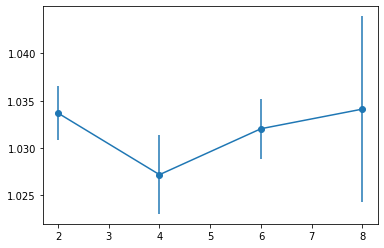

In [6]:
fig = plt.figure()

for k in ['charge_ranked']:
    data[k]['rank'] = ranks
    _means = data[k].groupby(['rank']).mean()
    _std = data[k].groupby(['rank']).std()
    _x = _means.index
    _y = _means['query_time']
    _yerr = _std['query_time']
    plt.errorbar(_x, _y, yerr=_yerr,fmt='o-')
plt.show()

## Gasstation

In [7]:
data['init']

time_contracted_graph  time_state_graph  nodes_state_graph  \
0               0.000136          0.000030                  1   
1               0.323515          0.000028                  2   
2               9.928760          0.000098                  6   
3               9.078340          0.000190                 12   
4              31.818989          0.000110                  8   
5              62.850130          0.000063                 10   

   edges_state_graph  nodes_contracted_graph  edges_contracted_graph  \
0                  0                       1                       0   
1                  0                       2                       0   
2                  3                       4                       1   
3                  9                       6                       3   
4                  2                       8                       1   
5                  0                      10                       0   

   charging_stations  
0                  1  
1                  2  
2                  4  
3                  6  
4                  8  
5                 10

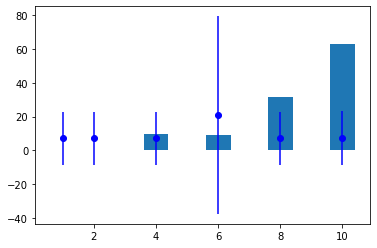

In [8]:
fig = plt.figure()
x = data['init']['charging_stations']
time_contracted=data['init']['time_contracted_graph']
time_state_graph = data['init']['time_state_graph']
plt.bar(x, time_contracted)
plt.bar(x, time_state_graph)

charge_query_times = data['init_charge_queries'].groupby('charging_stations').mean()
charge_query_times_std = data['init_charge_queries'].groupby('charging_stations').std()
plt.errorbar(x, charge_query_times['query_time'], yerr=charge_query_times_std['query_time'], fmt='bo')

plt.show()